In [7]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.svm import SVC
import numpy as np
import pickle
import preprocessing as pre
import testing 

### Load training data

In [ ]:
X, y = pre.load_data('../data/fashion_train.npy')
pca = pickle.load(open('./models/pca_65.pkl', 'rb'))
X_processed = pre.preprocess(X,pca)

### Hyperparameter optimazition

In [ ]:
# Grid search just like with decision tree classifier

# define the search space of features gamma and C
C_range = list(np.logspace(-3, 1, 5))
gamma_range = list(np.logspace(-3, 1, 5))
gamma_range.append('scale')
gamma_range.append('auto')
param_grid = dict(gamma=gamma_range, C=C_range)
# initialize cross validation and grid search
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
# fit grid search
grid.fit(X_processed, y)

print(
    "The best parameters are %s with a score of %0.4f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 10.0, 'gamma': 'scale'} with a score of 0.8786

### Create model

In [ ]:
model = SVC(kernel='rbf', C=10, gamma='scale')
model.fit(X_processed, y)

In [6]:
# save the model
with open('./models/svm_model.pkl', 'wb') as f:
    pickle.dump(model, f)

### Bootstrapping test

In [ ]:
svm_results = testing.bootstrapping_test(model_filepath="models/svm_model.pkl")

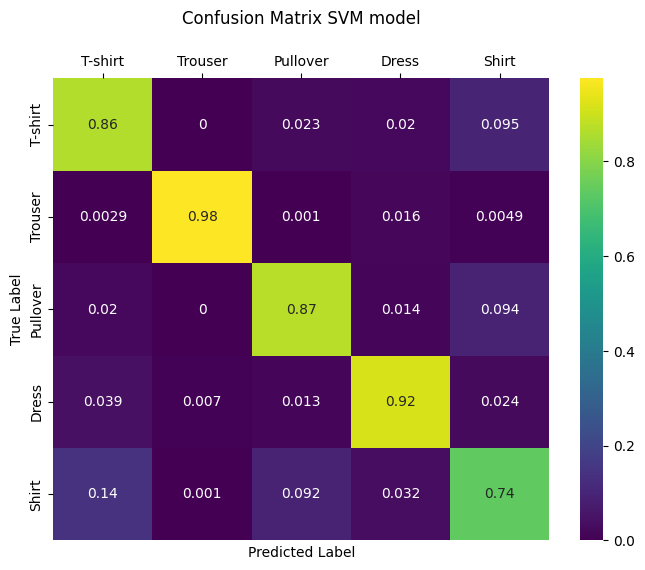

In [11]:
testing.plot_confusion_matrix(svm_results["cm"],title="Confusion Matrix SVM model")